In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q -U keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert labels to one-hot encoding for test set to work with categorical cross entropy
y_test = to_categorical(y_test, num_classes=10)

#80:20 split with the data
validation_ratio = 0.2

# Split data into new training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=validation_ratio, random_state=42)

# Convert labels to one-hot encoding for training and validation sets
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

# Scale the pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Check shapes
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
x_train shape: (40000, 32, 32, 3)
y_train shape: (40000, 10)
x_val shape: (10000, 32, 32, 3)
y_val shape: (10000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization


In [ ]:
num_classes =10

model = Sequential()

model.add(Conv2D(
    filters=96,
    kernel_size=(3, 3),
    input_shape=(32, 32, 3),
    padding='same',
    strides=(2, 2),
    activation='relu',
    name='conv_layer_1'
))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2),
    name='pool_layer_1'
))

model.add(Conv2D(
    filters=256,
    kernel_size=(3, 3),
    padding='same',
    strides=(1, 1),
    activation='relu',
    name='conv_layer_2'
))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2),
    name='pool_layer_2'
))

model.add(Conv2D(
    filters=384,
    kernel_size=(3, 3),
    padding='same',
    strides=(1, 1),
    activation='relu',
    name='conv_layer_3'
))

model.add(Conv2D(
    filters=384,
    kernel_size=(3, 3),
    padding='same',
    strides=(1, 1),
    activation='relu',
    name='conv_layer_4'
))

model.add(Conv2D(
    filters=256,
    kernel_size=(3, 3),
    padding='same',
    strides=(1, 1),
    activation='relu',
    name='conv_layer_5'
))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2),
    name='pool_layer_3'
))

model.add(Flatten())

model.add(Dense(
    4096,
    activation='relu',
    name='FCL'
))
model.add(Dropout(0.5))

model.add(Dense(
    4096,
    activation='relu',
    name='FCL_2'
))
model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax', name='output_layer'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_layer_1 (Conv2D)                │ (None, 16, 16, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool_layer_1 (MaxPooling2D)          │ (None, 8, 8, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_2 (Conv2D)                │ (None, 8, 8, 256)           │         221,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool_layer_2 (MaxPooling2D)          │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_3 (Conv2D)                │ (None, 4, 4, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_4 (Conv2D)                │ (None, 4, 4, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_5 (Conv2D)                │ (None, 4, 4, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool_layer_3 (MaxPooling2D)          │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FCL (Dense)                          │ (None, 4096)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FCL_2 (Dense)                        │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,342,410 (92.86 MB)

 Trainable params: 24,342,410 (92.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Set up callbacks for early stopping and model checkpointing
checkpoint_path = "/content/drive/MyDrive/Deep Learning Uni/alex_model.keras"
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,  # Stop if no improvement for 10 epochs
    mode='max',
    verbose=1,
    restore_best_weights=True
)

In [ ]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1617 - loss: 2.1599
Epoch 1: val_accuracy improved from -inf to 0.38130, saving model to /content/drive/MyDrive/Deep Learning Uni/alex_model.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.1617 - loss: 2.1597 - val_accuracy: 0.3813 - val_loss: 1.5943
Epoch 2/100
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4247 - loss: 1.5354
Epoch 2: val_accuracy improved from 0.38130 to 0.49490, saving model to /content/drive/MyDrive/Deep Learning Uni/alex_model.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.4247 - loss: 1.5352 - val_accuracy: 0.4949 - val_loss: 1.4119
Epoch 3/100
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5305 - loss: 1.3152
Epoch 3: val_accuracy improved from 0.49490 to 0.56620, saving model to /content/drive/MyDrive/Deep Learning Uni/alex_model.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.5305 - loss: 1.3151 - val_accuracy: 0.5662

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Set up callbacks for early stopping and model checkpointing
checkpoint_path = "/content/drive/MyDrive/Deep Learning Uni/alex_model2.keras"
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,  # Stop if no improvement for 10 epochs
    mode='max',
    verbose=1,
    restore_best_weights=True
)

In [ ]:
model  = tf.keras.models.load_model('/content/drive/MyDrive/best_model_1.keras')

#Hyper parameter tunning

Reference:https://keras.io/guides/keras_tuner/getting_started/#introduction

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from kerastuner import RandomSearch

def build_model(hp):
    model = Sequential()

    # Convolutional Layer 1
    model.add(Conv2D(
        filters=hp.Choice('conv_1_filters', values=[64, 96, 128]),
        kernel_size=(3, 3),
        strides=(2, 2),
        padding='same',
        activation='relu',
        input_shape=(32, 32, 3)
    ))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Convolutional Layer 2
    model.add(Conv2D(
        filters=hp.Choice('conv_2_filters', values=[128, 256, 384]),
        kernel_size=(3, 3),
        padding='same',
        activation='relu'
    ))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Convolutional Layers 3,4
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Convolutional Layer 5
    model.add(Conv2D(
        filters=hp.Choice('conv_5_filters', values=[128, 256]),
        kernel_size=(3, 3),
        padding='same',
        activation='relu'
    ))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(Flatten())

    # Fully Connected(FC) Layer 1
    model.add(Dense(
        units=hp.Choice('dense_units', values=[1024, 2048, 4096]),
        activation='relu',
        kernel_regularizer=l2(hp.Choice('l2_reg', values=[0.0001, 0.001]))
    ))
    model.add(Dropout(rate=hp.Choice('dropout_rate', values=[0.3, 0.5, 0.6])))

    # Fully Connected (FC) Layer 2
    model.add(Dense(
        units=hp.Choice('dense_units', values=[1024, 2048, 4096]),
        activation='relu',
        kernel_regularizer=l2(hp.Choice('l2_reg', values=[0.0001, 0.001]))
    ))
    model.add(Dropout(rate=hp.Choice('dropout_rate', values=[0.3, 0.5, 0.6])))

    # Output Layer
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


ModuleNotFoundError: No module named 'kerastuner'

In [ ]:
from kerastuner.tuners import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of trials
    executions_per_trial=1,  # models to train per combination
    directory='tuner_dir',
    project_name='cifar10_hyperparameter_tuning'
)


In [ ]:
tuner.search(x_train, y_train, epochs=50, validation_data=(x_val, y_val), callbacks=[early_stopping])


Trial 10 Complete [00h 06m 06s]
val_accuracy: 0.7376999855041504

Best val_accuracy So Far: 0.7376999855041504
Total elapsed time: 00h 51m 09s


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate on the test set
test_loss, test_accuracy = best_model.evaluate(x_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7168 - loss: 0.9530
Test accuracy: 0.7163000106811523


In [ ]:
best_model.save("/content/drive/MyDrive/Deep Learning Uni/alexnet_tuned.keras")

In [ ]:
from tensorflow.keras.models import load_model

# Load the best model
loaded_model = load_model("/content/drive/MyDrive/Deep Learning Uni/alexnet_tuned.keras")

# Evaluate or use the loaded model as needed
test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7168 - loss: 0.9530
Test accuracy: 0.7163000106811523


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7168 - loss: 0.9530
Test accuracy: 0.7163000106811523
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.7731    0.7770    0.7751      1000
           1     0.8297    0.8380    0.8338      1000
           2     0.6626    0.5970    0.6281      1000
           3     0.5311    0.3930    0.4517      1000
           4     0.6773    0.6800    0.6786      1000
           5     0.5639    0.6750    0.6145      1000
           6     0.7239    0.8050    0.7623      1000
           7     0.7558    0.7490    0.7524      1000
           8     0.8312    0.8570    0.8439      1000
           9     0.7849    0.7920    0.7885      1000

    accuracy                         0.7163     10000
   macro avg     0.7134    0.7163    0.7129     10000
weighted avg     0.7134    0.7163    0.7129     10000


Confusion Matrix:
[[777  24  37   9  15   7  11  11  71  38]
 [ 17

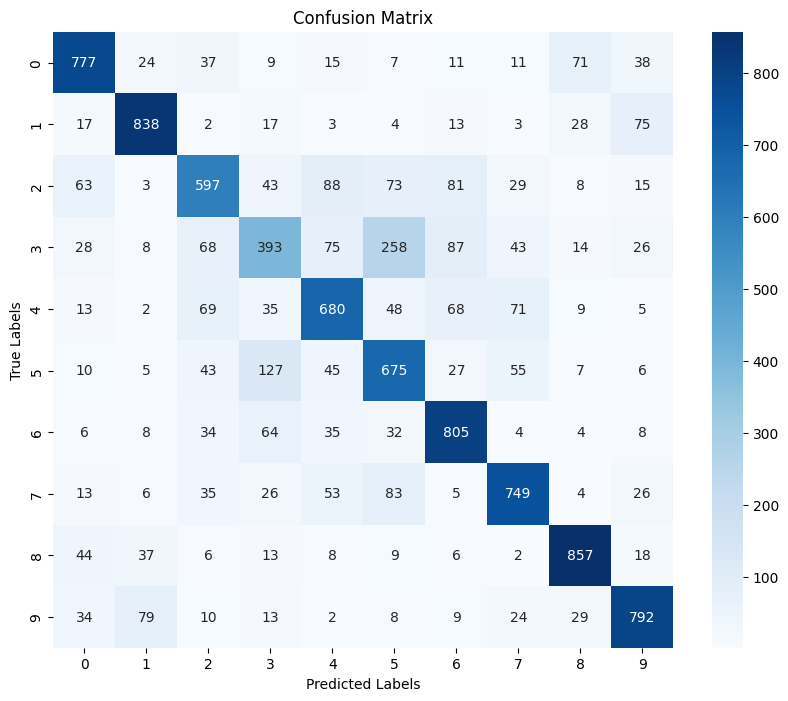


Median Validation Accuracy: 0.6614999771118164
Median Test Accuracy: 0.7163000106811523


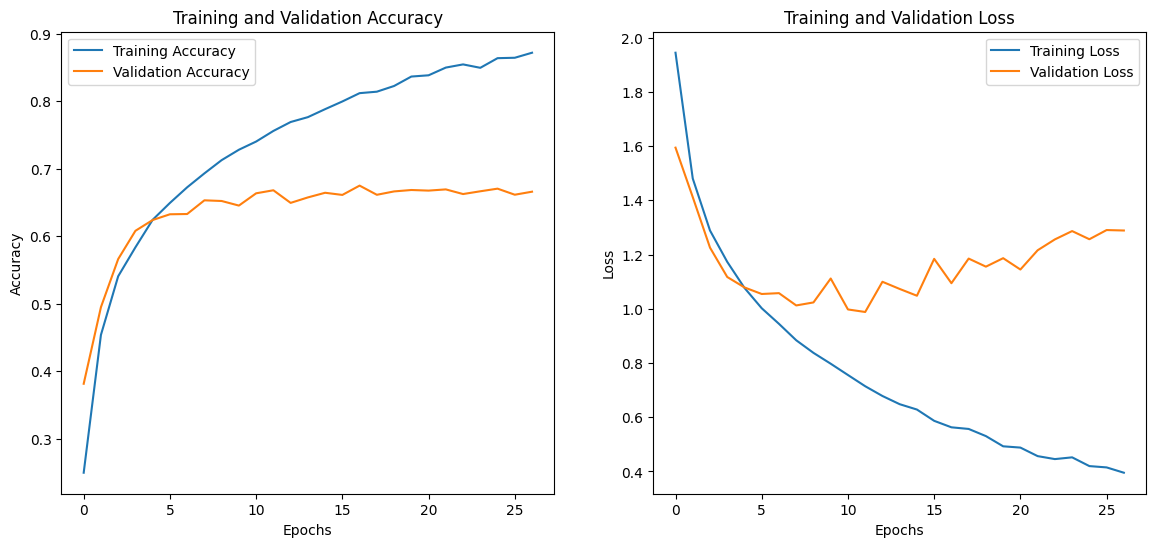

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


loaded_model = load_model("/content/drive/MyDrive/Deep Learning Uni/alexnet_tuned.keras")

test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

y_pred = loaded_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, digits=4))

# Confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Calculate median validation accuracy
try:
    val_accuracies = history.history['val_accuracy']
    median_val_accuracy = np.median(val_accuracies)
    print(f"\nMedian Validation Accuracy: {median_val_accuracy}")
except NameError:
    print("History object not found. Cannot compute median validation accuracy.")

# Median test accuracy
print(f"Median Test Accuracy: {test_accuracy}")


# try:
    # Accuracy plot
  plt.figure(figsize=(14, 6))

  # Training and validation accuracy
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.title("Training and Validation Accuracy")
  plt.legend()

  # Training and validation loss
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title("Training and Validation Loss")
  plt.legend()

  plt.show()
# except Exception as e:
#     print(e)


In [ ]:
for trial in tuner.oracle.trials.values():
    print(f"Trial ID: {trial.trial_id}")
    print(f"Hyperparameters: {trial.hyperparameters.values}")
    print(f"Validation Accuracy: {trial.score}")
    print("---------------------------------------------------------")


Trial ID: 00
Hyperparameters: {'conv_1_filters': 64, 'conv_2_filters': 256, 'conv_5_filters': 128, 'dense_units': 2048, 'l2_reg': 0.001, 'dropout_rate': 0.5, 'learning_rate': 0.0001}
Validation Accuracy: 0.7246999740600586
---------------------------------------------------------
Trial ID: 01
Hyperparameters: {'conv_1_filters': 64, 'conv_2_filters': 128, 'conv_5_filters': 256, 'dense_units': 2048, 'l2_reg': 0.0001, 'dropout_rate': 0.3, 'learning_rate': 0.001}
Validation Accuracy: 0.1023000031709671
---------------------------------------------------------
Trial ID: 02
Hyperparameters: {'conv_1_filters': 64, 'conv_2_filters': 256, 'conv_5_filters': 128, 'dense_units': 1024, 'l2_reg': 0.0001, 'dropout_rate': 0.3, 'learning_rate': 0.01}
Validation Accuracy: 0.10300000011920929
---------------------------------------------------------
Trial ID: 03
Hyperparameters: {'conv_1_filters': 128, 'conv_2_filters': 128, 'conv_5_filters': 128, 'dense_units': 1024, 'l2_reg': 0.001, 'dropout_rate': 0.6

In [ ]:
# extract the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Print the best model's architecture
print("Best Model Architecture:")
best_model.summary()


Best Model Architecture:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 16, 16, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 8, 8, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 384)           │         332,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,984,266 (22.83 MB)

 Trainable params: 5,984,266 (22.83 MB)

 Non-trainable params: 0 (0.00 B)

One more try

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from kerastuner import RandomSearch

def build_model(hp):
    model = Sequential()

    # Convolutional Layer 1
    model.add(Conv2D(
        filters=hp.Choice('conv_1_filters', values=[64, 96, 128]),
        kernel_size=(3, 3),
        strides=(2, 2),
        padding='same',
        activation='relu',
        input_shape=(32, 32, 3),
        name='conv_layer_1'
    ))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='pool_layer_1'))

    # Convolutional Layer 2
    model.add(Conv2D(
        filters=hp.Choice('conv_2_filters', values=[128, 256, 384]),
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        name='conv_layer_2'
    ))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='pool_layer_2'))

    # Convolutional Layers 3 and 4
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu', name='conv_layer_3'))
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu', name='conv_layer_4'))

    # Convolutional Layer 5
    model.add(Conv2D(
        filters=hp.Choice('conv_5_filters', values=[128, 256]),
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        name='conv_layer_5'
    ))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='pool_layer_3'))

    model.add(Flatten(name='flatten_layer'))

    # Fully Connected Layer 1
    model.add(Dense(
        units=hp.Choice('dense_units', values=[1024, 2048, 4096]),
        activation='relu',
        kernel_regularizer=l2(hp.Choice('l2_reg', values=[0.0001, 0.001])),
        name='dense_layer_1'
    ))
    model.add(Dropout(rate=hp.Choice('dropout_rate', values=[0.3, 0.5, 0.6]), name='dropout_layer_1'))

    # Fully Connected Layer 2
    model.add(Dense(
        units=hp.Choice('dense_units', values=[1024, 2048, 4096]),
        activation='relu',
        kernel_regularizer=l2(hp.Choice('l2_reg', values=[0.0001, 0.001])),
        name='dense_layer_2'
    ))
    model.add(Dropout(rate=hp.Choice('dropout_rate', values=[0.3, 0.5, 0.6]), name='dropout_layer_2'))

    # Output Layer
    model.add(Dense(10, activation='softmax', name='output_layer'))

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [ ]:
from kerastuner.tuners import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to train per combination
    directory='tuner_dir',
    project_name='cifar10_hyperparameter_tuning'
)


Reloading Tuner from tuner_dir/cifar10_hyperparameter_tuning/tuner0.json


In [ ]:
tuner.search(x_train, y_train, epochs=50, validation_data=(x_val, y_val), callbacks=[early_stopping])


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate on the test set
test_loss, test_accuracy = best_model.evaluate(x_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7168 - loss: 0.9530
Test accuracy: 0.7163000106811523


In [ ]:
# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Print the best model's architecture
print("Best Model Out of all permutations of different Architecture:")
best_model.summary()


Best Model Out of all permutations of different Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_layer_1 (Conv2D)                │ (None, 16, 16, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool_layer_1 (MaxPooling2D)          │ (None, 8, 8, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_2 (Conv2D)                │ (None, 8, 8, 384)           │         332,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool_layer_2 (MaxPooling2D)          │ (None, 4, 4, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_3 (Conv2D)                │ (None, 4, 4, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_4 (Conv2D)                │ (None, 4, 4, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_5 (Conv2D)                │ (None, 4, 4, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool_layer_3 (MaxPooling2D)          │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_layer (Flatten)              │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_1 (Dense)                │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_layer_1 (Dropout)            │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_layer_2 (Dropout)            │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,984,266 (22.83 MB)

 Trainable params: 5,984,266 (22.83 MB)

 Non-trainable params: 0 (0.00 B)